<a href="https://colab.research.google.com/github/govindvarma1/Machine-Learning/blob/main/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np

In [22]:
class NaiveBayes:

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self._classes = np.unique(y)
    n_classes = len(self._classes)

    self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
    self._var = np.zeros((n_classes, n_features), dtype=np.float64)
    self._priors = np.zeros(n_classes, dtype=np.float64)

    for idx, c in enumerate(self._classes):
      X_c = X[y==c]
      self._mean[idx, :] = X_c.mean(axis=0)
      self._var[idx, :] = X_c.var(axis=0)
      self._priors[idx] = X_c.shape[0] / float(n_samples)


  def predict(self, X):
    y_pred = [self._predict(x) for x in X]
    return y_pred

  def _predict(self, x):
    posteriors = []

    for idx, c in enumerate(self._classes):
      prior = np.log(self._priors[idx])
      posterior = np.sum(np.log(self._pdf(idx, x)))
      posteriors.append(prior + posterior)

    return self._classes[np.argmax(posteriors)]

  def _pdf(self, class_idx, x):
    mean = self._mean[class_idx]
    var = self._var[class_idx]
    numerator = np.exp(- ((x-mean)**2) / (2 * var))
    denominator = np.sqrt(2 * np.pi * var)
    return numerator / denominator

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

X, y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print("Naive Bayes classification accuracy", accuracy(y_test, predictions))

Naive Bayes classification accuracy 0.965


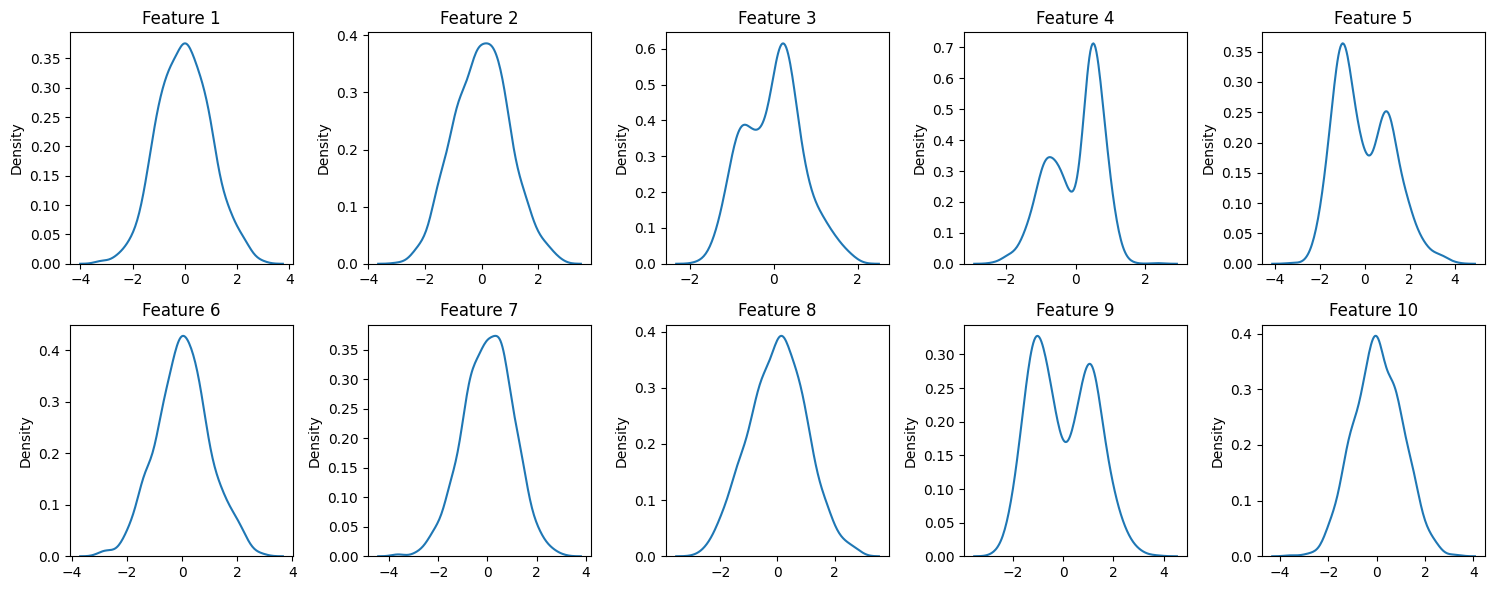

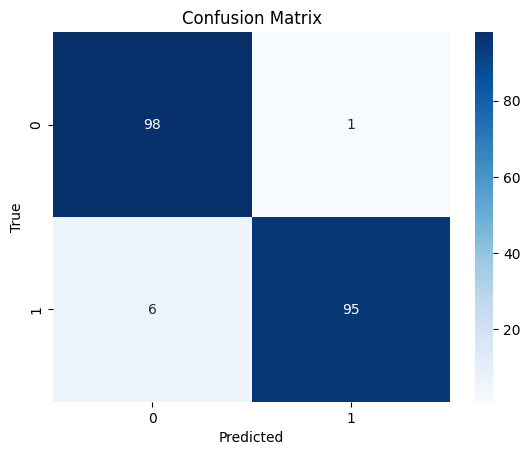

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

axes = axes.flatten()

for i in range(10):
    sns.kdeplot(X[:, i], ax=axes[i])
    axes[i].set_title(f"Feature {i+1}")
    axes[i].set_xlabel("")
plt.tight_layout()
plt.show()

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()